SECTION 1: Install dataset and Prepare Environment !
**note** ! the explainer is in the data_set_cartpole folder you'll get after running this section

In [ ]:
# ===============================
# INSTALL REQUIRED PACKAGES AND DOWNLOAD DATA
# ===============================

# Install gdown if not already installed
!pip install gdown --upgrade --quiet

# Download the zip file
!gdown 1JQV2XnoKjDMaQCz8gQGiPp51SKy-fFOD -O data_set_cartpole.zip

# Unzip the file
!unzip -q data_set_cartpole.zip -d data_set_cartpole


Downloading...
From: https://drive.google.com/uc?id=1JQV2XnoKjDMaQCz8gQGiPp51SKy-fFOD
To: /content/data_set_cartpole.zip
100% 369k/369k [00:00<00:00, 34.3MB/s]


**SECTION 2: Import Libraries**

In [ ]:
# ===============================
# INSTALL REQUIRED LIBRARIES

# join time sections
# ===============================
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

!pip install gymnasium --quiet

import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import gymnasium as gym



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.2 MB/s eta 0:00:00
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
From (redirected): https://drive.google.com/uc?id=1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq&confirm=t&uuid=b2931254-27f3-48e0-817a-43bebac8e6e7
To: /content/dataset_labels.npz
100% 31.4M/31.4M [00:00<00:00, 92.9MB/s]
time: 7.92 s (started: 2025-02-01 17:31:56 +00:00)


**SECTION 3: Utility Functions**

In [ ]:
# ===============================
# UTILITY FUNCTIONS
# ===============================

def load_data(file_path):
    """
    Load the dataset from a JSON file and return states and actions.
    """
    with open(file_path, "r") as f:
        data = json.load(f)
    states = np.array([sample["state"] for sample in data])
    actions = np.array([sample["action"] for sample in data])
    return states, actions

def plot_loss_with_epoch_avg(history, title, avg_window=40):
    """
    Plot the training and validation loss over epochs,
    with the average of the last 'avg_window' epochs marked in red.

    Args:
        history: Training history object returned by model.fit().
        title: Title of the plot.
        avg_window: Number of last epochs to calculate the moving average.
    """
    epochs = len(history.history['loss'])

    # Extract losses for all epochs
    train_losses = history.history['loss']
    val_losses = history.history['val_loss']

    # Plot all epochs
    plt.plot(range(epochs), train_losses, label='Training Loss', color='blue')
    plt.plot(range(epochs), val_losses, label='Validation Loss', color='green')

    # Highlight the average of the last 'avg_window' epochs
    if epochs >= avg_window:
        avg_train_loss = np.mean(train_losses[-avg_window:])
        avg_val_loss = np.mean(val_losses[-avg_window:])
        plt.axhline(y=avg_train_loss, color='red', linestyle='--', label=f'Avg Training Loss (Last {avg_window} Epochs)')
        plt.axhline(y=avg_val_loss, color='orange', linestyle='--', label=f'Avg Validation Loss (Last {avg_window} Epochs)')

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()




def test_model_on_gym(model, scaler, title):
    """
    Test a trained model on the Gymnasium CartPole environment and print results.
    """
    env = gym.make("CartPole-v1", render_mode='human')
    state, _ = env.reset()

    done = False
    steps = 0
    while not done:
        state_normalized = scaler.transform([state])  # Normalize state
        action_probs = model.predict(state_normalized)
        action = np.argmax(action_probs[0])  # Take the action with the highest probability

        state, _, done, _, _ = env.step(action)
        steps += 1

    env.close()
    print(f"{title}: Model successfully ran for {steps} steps in the Gym environment.")


time: 1.4 ms (started: 2025-02-01 17:32:04 +00:00)


**SECTION 4: Train Neural Network for imitation leraning on 7000 examples**


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7737 - loss: 0.4858 - val_accuracy: 0.8870 - val_loss: 0.2771
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8913 - loss: 0.2700 - val_accuracy: 0.8980 - val_loss: 0.2316
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9104 - loss: 0.2176 - val_accuracy: 0.9080 - val_loss: 0.2050
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9169 - loss: 0.1986 - val_accuracy: 0.9090 - val_loss: 0.1951
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.1976 - val_accuracy: 0.9140 - val_loss: 0.1867
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9300 - loss: 0.1737 - val_accuracy: 0.9140 - val_loss: 0.1799
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9291 - loss: 0.1643 - val_accuracy: 0.9120 - val_loss: 0.1797
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.1691 - val_accuracy: 0

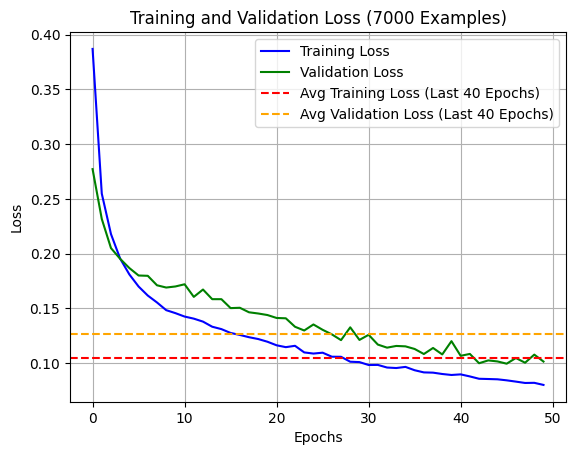

time: 42.2 s (started: 2025-02-01 17:32:04 +00:00)


In [ ]:
# ===============================
# TRAIN NEURAL NETWORK ON 7000 EXAMPLES - 5000 train, 2000 test
# ===============================

# Load the full dataset
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
states, actions = load_data(data_file)

# Split the data into training (5000 examples) and test sets (2000 examples)
train_size = 5000
X_train, X_test, y_train, y_test = states[:train_size], states[train_size:], actions[:train_size], actions[train_size:]

# Further split the training data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the states
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(2, activation='softmax')  # Output: probabilities for 2 actions (left, right)
])

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)

# Plot loss
plot_loss_with_epoch_avg(history, title="Training and Validation Loss (7000 Examples)", avg_window=40)


In [ ]:
#saving the scalar:
import joblib

# Save the scaler used for normalization
scaler_filename = "cartpole_scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")


Scaler saved as cartpole_scaler.pkl
time: 2.24 ms (started: 2025-02-01 17:32:46 +00:00)


**SECTION 5: Test Neural Network on Test Set - 7000 examples**

In [ ]:
# ===============================
# TEST NEURAL NETWORK ON TEST SET (7000 EXAMPLES)
# ===============================
import imageio
from IPython.display import Video

# Reload and normalize the test data
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
states, actions = load_data(data_file)

# Split the data into training (5000 examples) and test sets (2000 examples)
train_size = 5000
_, test_states, _, test_actions = states[:train_size], states[train_size:], actions[:train_size], actions[train_size:]

# Normalize the test states using the same scaler used for training
test_states = scaler.transform(test_states)

# Function to record video for the Gymnasium environment
def record_gym_video(model, scaler, video_filename, num_episodes=1, max_steps=500):
    """
    Record video of the model running on the Gymnasium CartPole environment.
    Args:
        model: Trained neural network.
        scaler: Scaler used for normalizing states.
        video_filename: Name of the video file to save.
        num_episodes: Number of episodes to evaluate.
        max_steps: Maximum number of steps in each episode.
    """
    env = gym.make("CartPole-v1", render_mode='rgb_array')
    best_steps = 0
    best_frames = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        frames = []
        steps = 0
        done = False

        print(f"Starting episode {episode + 1}...")  # DEBUG: Start of episode

        while not done and steps < max_steps:
            # Normalize the state
            state_normalized = scaler.transform([state])
            action_probs = model.predict(state_normalized, verbose=0)
            action = np.argmax(action_probs[0])  # Take the action with the highest probability

            # Perform the action and store the frame
            state, _, done, _, _ = env.step(action)
            frames.append(env.render())

            steps += 1

        print(f"Episode {episode + 1} finished with {steps} steps.")  # DEBUG: Score for the episode

        # Update the best run
        if steps > best_steps:
            best_steps = steps
            best_frames = frames

    # Save the best run as a video
    with imageio.get_writer(video_filename, fps=30) as video:
        for frame in best_frames:
            video.append_data(frame)

    env.close()
    return best_steps, video_filename

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_states, test_actions, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Print accuracy as percentage

# Test on the Gym environment and record video
video_filename = "cartpole_7000_model.mp4"
best_steps, video_file = record_gym_video(model, scaler, video_filename )

print(f"Model ran successfully for the best run with {best_steps} steps.")
print(f"Video saved as {video_file}")

# Display the video in the notebook
Video(video_file, embed=True)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9671 - loss: 0.0755
Test Loss: 0.10264859348535538, Test Accuracy: 0.9509999752044678
Test Accuracy: 95.10%
Starting episode 1...
Episode 1 finished with 500 steps.


Model ran successfully for the best run with 500 steps.
Video saved as cartpole_7000_model.mp4


time: 57.6 s (started: 2025-02-01 17:32:46 +00:00)


**SECTION 6: Save the model**

In [ ]:
# Save the model
model.save('cartpole_imitation_7000.h5')
print("Model saved as 'cartpole_imitation_7000.h5'")

Model saved as 'cartpole_imitation_7000.h5'
time: 35.9 ms (started: 2025-02-01 17:34:02 +00:00)


**SECTION 7: Train Neural Network on 1000 Examples**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5682 - loss: 0.7259 - val_accuracy: 0.7550 - val_loss: 0.4919
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7654 - loss: 0.4500 - val_accuracy: 0.8200 - val_loss: 0.3703
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8453 - loss: 0.3378 - val_accuracy: 0.8500 - val_loss: 0.3141
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8336 - loss: 0.3218 - val_accuracy: 0.8700 - val_loss: 0.2744
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8749 - loss: 0.2777 - val_accuracy: 0.8850 - val_loss: 0.2384
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8977 - loss: 0.2446 - val_accuracy: 0.9150 - val_loss: 0.2100
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8948 - loss: 0.2446 - val_accuracy: 0.9050 - val_loss: 0.2117
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9072 - loss: 0.2138 - val_accuracy: 0.9250 - val_loss: 0.1886
Ep

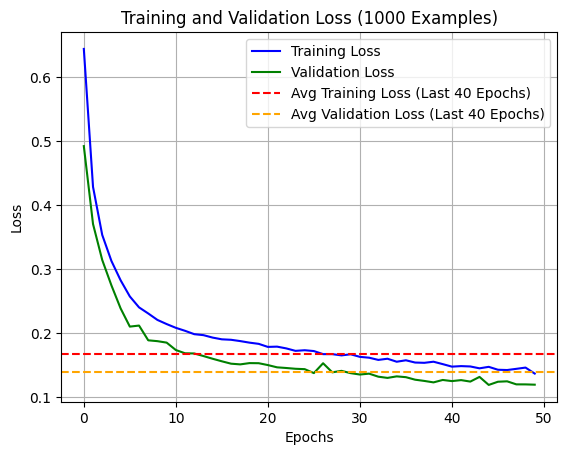

time: 16.4 s (started: 2025-02-01 17:33:46 +00:00)


In [ ]:
# ===============================
# TRAIN NEURAL NETWORK ON 1000 EXAMPLES
# ===============================
train_file = "/content/data_set_cartpole/cartpole_data_1000.json"
states, actions = load_data(train_file)

# Normalize the states for training data
states = scaler.fit_transform(states)

# Split the 1000 examples into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(states, actions, test_size=0.2, random_state=42)

# Select random 200 examples for testing from the original 2000 test set
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
all_states, all_actions = load_data(data_file)

# Randomly sample 200 test examples
test_size = 200
test_indices = np.random.choice(range(len(all_states)), test_size, replace=False)
X_test = np.array([all_states[i] for i in test_indices])
y_test = np.array([all_actions[i] for i in test_indices])

# Normalize the test data using the same scaler as training
X_test = scaler.transform(X_test)

# Define the model
model_1000 = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(2, activation='softmax')  # Output: probabilities for 2 actions (left, right)
])

# Compile the model
learning_rate = 0.001
batch_size = 16  # Smaller batch size for fewer data points
epochs = 50
model_1000.compile(optimizer=Adam(learning_rate=learning_rate),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model with validation data
history = model_1000.fit(X_train, y_train,
                         validation_data=(X_val, y_val),
                         epochs=epochs,
                         batch_size=batch_size,
                         verbose=1)

# Plot loss
plot_loss_with_epoch_avg(history, title="Training and Validation Loss (1000 Examples)", avg_window=40)

**SECTION 8: Test Neural Network on Test Set (1000 Examples)**



In [ ]:
# ===============================
# TEST NEURAL NETWORK ON TEST SET (1000 EXAMPLES)
# ===============================
import imageio
from IPython.display import Video

# Function to record video for the Gymnasium environment
def record_gym_video(model, scaler, video_filename, num_episodes=2, max_steps=500):
    """
    Record video of the model running on the Gymnasium CartPole environment.
    Args:
        model: Trained neural network.
        scaler: Scaler used for normalizing states.
        video_filename: Name of the video file to save.
        num_episodes: Number of episodes to evaluate.
        max_steps: Maximum number of steps in each episode.
    """
    env = gym.make("CartPole-v1", render_mode='rgb_array')
    best_steps = 0
    best_frames = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        frames = []
        steps = 0
        done = False

        print(f"Starting episode {episode + 1}...")  # DEBUG: Start of episode

        while not done and steps < max_steps:
            # Normalize the state
            state_normalized = scaler.transform([state])
            action_probs = model.predict(state_normalized, verbose=0)
            action = np.argmax(action_probs[0])  # Take the action with the highest probability

            # Perform the action and store the frame
            state, _, done, _, _ = env.step(action)
            frames.append(env.render())

            steps += 1

        print(f"Episode {episode + 1} finished with {steps} steps.")  # DEBUG: Score for the episode

        # Update the best run
        if steps > best_steps:
            best_steps = steps
            best_frames = frames

    # Save the best run as a video
    with imageio.get_writer(video_filename, fps=30) as video:
        for frame in best_frames:
            video.append_data(frame)

    env.close()
    return best_steps, video_filename


# Evaluate the model on the test data (1000 examples)
test_loss, test_accuracy = model_1000.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Print accuracy as percentage

# Test on the Gym environment and record video
video_filename = "cartpole_1000_model.mp4"
best_steps, video_file = record_gym_video(model_1000, scaler, video_filename)

print(f"Model ran successfully for the best run with {best_steps} steps.")
print(f"Video saved as {video_file}")

# Display the video in the notebook
Video(video_file, embed=True)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9801 - loss: 0.1009  
Test Loss: 0.11635353416204453, Test Accuracy: 0.9700000286102295
Test Accuracy: 97.00%
Starting episode 1...
Episode 1 finished with 500 steps.
Starting episode 2...


Episode 2 finished with 500 steps.
Model ran successfully for the best run with 500 steps.
Video saved as cartpole_1000_model.mp4


time: 1min 16s (started: 2025-02-01 17:34:02 +00:00)


**SECTION 9: Save the model_1000_examples**

In [ ]:
# Save the model
model_1000.save('cartpole_imitation_1000.h5')
print("Model saved as 'cartpole_imitation_1000.h5'")

Model saved as 'cartpole_imitation_1000.h5'
time: 25.4 ms (started: 2025-02-01 17:35:18 +00:00)


**SECTION 10: Train Neural Network on 500 Examples**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7344 - loss: 0.5554 - val_accuracy: 0.8000 - val_loss: 0.4648
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8649 - loss: 0.4466 - val_accuracy: 0.9400 - val_loss: 0.3729
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9068 - loss: 0.3535 - val_accuracy: 0.9300 - val_loss: 0.3035
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9269 - loss: 0.2832 - val_accuracy: 0.9300 - val_loss: 0.2537
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9367 - loss: 0.2352 - val_accuracy: 0.9300 - val_loss: 0.2244
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9156 - loss: 0.2298 - val_accuracy: 0.9300 - val_loss: 0.2085
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9382 - loss: 0.2041 - val_accuracy: 0.9300 - val_loss: 0.1964
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9336 - loss: 0.1879 - val_accuracy: 0.9300 - val_loss: 0.

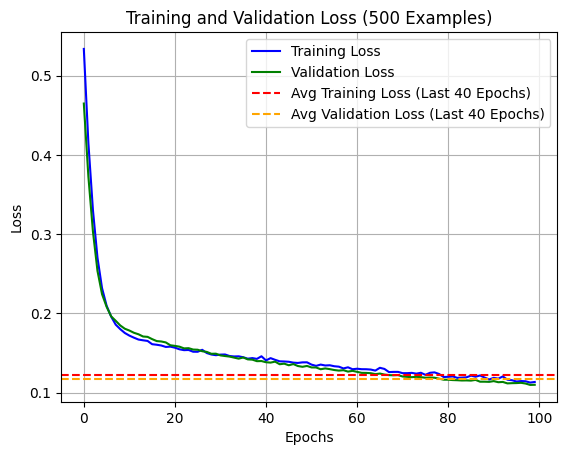

time: 27.2 s (started: 2025-02-01 17:43:32 +00:00)


In [ ]:
# ===============================
# TRAIN NEURAL NETWORK ON 500 EXAMPLES
# ===============================
train_file = "/content/data_set_cartpole/cartpole_data_500.json"
states, actions = load_data(train_file)

# Normalize the states for training data
states = scaler.fit_transform(states)

# Split the 500 examples into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(states, actions, test_size=0.2, random_state=42)

# Select random 100 examples for testing from the original 2000 test set
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
all_states, all_actions = load_data(data_file)

# Randomly sample 100 test examples
test_size = 100
test_indices = np.random.choice(range(len(all_states)), test_size, replace=False)
X_test = np.array([all_states[i] for i in test_indices])
y_test = np.array([all_actions[i] for i in test_indices])

# Normalize the test data using the same scaler as training
X_test = scaler.transform(X_test)

# Define the model
model_500 = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(2, activation='softmax')  # Output: probabilities for 2 actions (left, right)
])

# Compile the model
learning_rate = 0.001
batch_size = 16  # Smaller batch size for fewer data points
epochs = 100
model_500.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model with validation data
history = model_500.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)

# Plot loss
plot_loss_with_epoch_avg(history, title="Training and Validation Loss (500 Examples)", avg_window=40)

**SECTION 11: Test Neural Network on Test Set - 500 examples**


In [ ]:
# ===============================
# TEST NEURAL NETWORK ON TEST SET (500 EXAMPLES)
# ===============================
# Evaluate the model on the test data (100 examples)
test_loss, test_accuracy = model_500.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Print accuracy as percentage

# Test on the Gym environment and record video
video_filename = "cartpole_500_model.mp4"
best_steps, video_file = record_gym_video(model_500, scaler, video_filename)

print(f"Model ran successfully for the best run with {best_steps} steps.")
print(f"Video saved as {video_file}")

# Display the video in the notebook
Video(video_file, embed=True)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8660 - loss: 0.9113  
Test Loss: 0.9321807026863098, Test Accuracy: 0.8500000238418579
Test Accuracy: 85.00%
Starting episode 1...
Episode 1 finished with 495 steps.
Starting episode 2...


Episode 2 finished with 500 steps.
Model ran successfully for the best run with 500 steps.
Video saved as cartpole_500_model.mp4


time: 1min 20s (started: 2025-02-01 17:44:02 +00:00)


**SECTION 12: Save the model_500_examples**

In [ ]:
# Save the model
model_500.save('cartpole_imitation_500.h5')
print("Model saved as 'cartpole_imitation_500.h5'")

Model saved as 'cartpole_imitation_500.h5'
time: 26.3 ms (started: 2025-02-01 17:36:14 +00:00)


**SECTION 13: Train Neural Network on 100 Examples**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3439 - loss: 0.7853 - val_accuracy: 0.2000 - val_loss: 0.7408
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5653 - loss: 0.6737 - val_accuracy: 0.6000 - val_loss: 0.6627
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7945 - loss: 0.5959 - val_accuracy: 0.6000 - val_loss: 0.6074
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8754 - loss: 0.4958 - val_accuracy: 0.6000 - val_loss: 0.5653
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8362 - loss: 0.4363 - val_accuracy: 0.7000 - val_loss: 0.5307
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8065 - loss: 0.4260 - val_accuracy: 0.7000 - val_loss: 0.5039
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8627 - loss: 0.3570 - val_accuracy: 0.7000 - val_loss: 0.4849
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8389 - loss: 0.3618 - val_accuracy: 0.7000 - val_loss: 0.

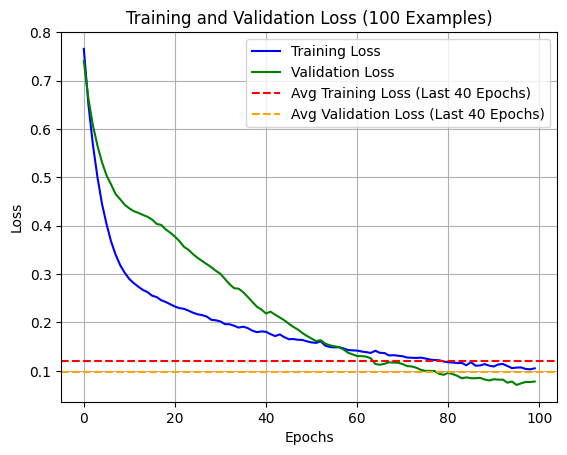

time: 16.2 s (started: 2025-02-01 17:54:51 +00:00)


In [ ]:
# ===============================
# TRAIN NEURAL NETWORK ON 100 EXAMPLES
# ===============================
train_file = "/content/data_set_cartpole/cartpole_data_100.json"
states, actions = load_data(train_file)

# Normalize the states for training data
states = scaler.fit_transform(states)

# Split the 100 examples into training (80%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(states, actions, test_size=0.1, random_state=42)

# Select random 20 examples for testing from the original 2000 test set
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
all_states, all_actions = load_data(data_file)

# Randomly sample 20 test examples
test_size = 20
test_indices = np.random.choice(range(len(all_states)), test_size, replace=False)
X_test = np.array([all_states[i] for i in test_indices])
y_test = np.array([all_actions[i] for i in test_indices])

# Normalize the test data using the same scaler as training
X_test = scaler.transform(X_test)

# Define the model
model_100 = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(2, activation='softmax')  # Output: probabilities for 2 actions (left, right)
])

# Compile the model
learning_rate = 0.001
batch_size = 8  # Smaller batch size for fewer data points
epochs = 100
model_100.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model with validation data
history = model_100.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)

# Plot loss
plot_loss_with_epoch_avg(history, title="Training and Validation Loss (100 Examples)", avg_window=40)

**SECTION 14: Test Neural Network on Test Set - 100 examples**




In [ ]:
# ===============================
# TEST NEURAL NETWORK ON TEST SET (100 EXAMPLES)
# ===============================
# Evaluate the model on the test data (20 examples)
test_loss, test_accuracy = model_100.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Print accuracy as percentage

# Test on the Gym environment and record video
video_filename = "cartpole_100_model.mp4"
best_steps, video_file = record_gym_video(model_100, scaler, video_filename ,num_episodes = 1)

print(f"Model ran successfully for the best run with {best_steps} steps.")
print(f"Video saved as {video_file}")

# Display the video in the notebook
Video(video_file, embed=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8000 - loss: 0.8169
Test Loss: 0.8168953061103821, Test Accuracy: 0.800000011920929
Test Accuracy: 80.00%
Starting episode 1...


Episode 1 finished with 500 steps.
Model ran successfully for the best run with 500 steps.
Video saved as cartpole_100_model.mp4


time: 41.5 s (started: 2025-02-01 17:55:12 +00:00)


**SECTION 15: Save the model_100_examples**

In [ ]:
# Save the model
model_100.save('cartpole_imitation_100.h5')
print("Model saved as 'cartpole_imitation_100.h5'")

Model saved as 'cartpole_imitation_100.h5'
time: 36.3 ms (started: 2025-02-01 17:56:00 +00:00)


**SECTION 16: Train Neural Network on 50 Examples**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.3468 - loss: 0.7753 - val_accuracy: 0.4000 - val_loss: 0.7293
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5380 - loss: 0.6920 - val_accuracy: 0.8000 - val_loss: 0.6667
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6745 - loss: 0.6402 - val_accuracy: 0.8000 - val_loss: 0.6131
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8310 - loss: 0.5963 - val_accuracy: 0.8000 - val_loss: 0.5654
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8532 - loss: 0.5375 - val_accuracy: 0.8000 - val_loss: 0.5267
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8435 - loss: 0.4973 - val_accuracy: 0.8000 - val_loss: 0.4905
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8343 - loss: 0.4700 - val_accuracy: 0.8000 - val_loss: 0.4638
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8329 - loss: 0.4357 - val_accuracy: 0.8000 - val_loss: 0.4424
Epo

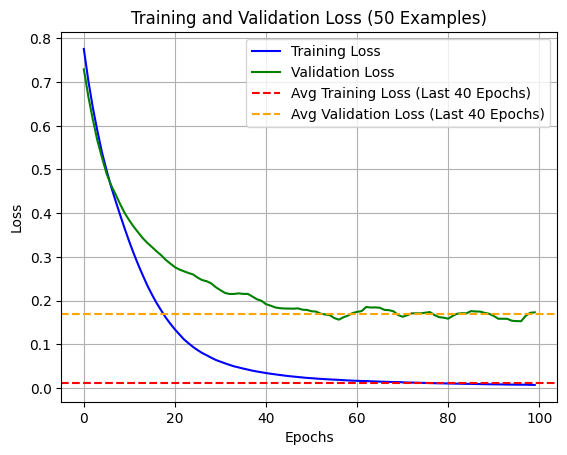

time: 16.3 s (started: 2025-02-01 17:37:07 +00:00)


In [ ]:
# ===============================
# TRAIN NEURAL NETWORK ON 50 EXAMPLES
# ===============================
train_file = "/content/data_set_cartpole/cartpole_data_50.json"
states, actions = load_data(train_file)

# Normalize the states for training data
states = scaler.fit_transform(states)

# Split the 50 examples into training (80%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(states, actions, test_size=0.1, random_state=42)

# Select random 10 examples for testing from the original 2000 test set
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
all_states, all_actions = load_data(data_file)

# Randomly sample 10 test examples
test_size = 10
test_indices = np.random.choice(range(len(all_states)), test_size, replace=False)
X_test = np.array([all_states[i] for i in test_indices])
y_test = np.array([all_actions[i] for i in test_indices])

# Normalize the test data using the same scaler as training
X_test = scaler.transform(X_test)

# Define the model
model_50 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(2, activation='softmax')  # Output: probabilities for 2 actions (left, right)
])

# Compile the model
learning_rate = 0.001
batch_size = 10  # Smaller batch size for fewer data points
epochs = 100
model_50.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with validation data
history = model_50.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=1)

# Plot loss
plot_loss_with_epoch_avg(history, title="Training and Validation Loss (50 Examples)", avg_window=40)

**SECTION 17: Test Neural Network on Test Set - 50 examples**




In [ ]:
# ===============================
# TEST NEURAL NETWORK ON TEST SET (50 EXAMPLES)
# ===============================
# Evaluate the model on the test data (20 examples)
test_loss, test_accuracy = model_50.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Print accuracy as percentage

# Test on the Gym environment and record video
video_filename = "cartpole_50_model.mp4"
best_steps, video_file = record_gym_video(model_50, scaler, video_filename , num_episodes = 10)

print(f"Model ran successfully for the best run with {best_steps} steps.")
print(f"Video saved as {video_file}")

# Display the video in the notebook
Video(video_file, embed=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8000 - loss: 1.6490
Test Loss: 1.6489769220352173, Test Accuracy: 0.800000011920929
Test Accuracy: 80.00%
Starting episode 1...
Episode 1 finished with 26 steps.
Starting episode 2...
Episode 2 finished with 25 steps.
Starting episode 3...
Episode 3 finished with 29 steps.
Starting episode 4...
Episode 4 finished with 38 steps.
Starting episode 5...
Episode 5 finished with 27 steps.
Starting episode 6...
Episode 6 finished with 35 steps.
Starting episode 7...
Episode 7 finished with 25 steps.
Starting episode 8...
Episode 8 finished with 99 steps.
Starting episode 9...
Episode 9 finished with 106 steps.
Starting episode 10...


Episode 10 finished with 42 steps.
Model ran successfully for the best run with 106 steps.
Video saved as cartpole_50_model.mp4


time: 35.8 s (started: 2025-02-01 17:37:23 +00:00)


**SECTION 19: Train Neural Network on 50 filtered Examples**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.4833 - loss: 0.6368 - val_accuracy: 0.8000 - val_loss: 0.4601
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7792 - loss: 0.5424 - val_accuracy: 0.8000 - val_loss: 0.4210
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8588 - loss: 0.5104 - val_accuracy: 1.0000 - val_loss: 0.3904
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9042 - loss: 0.5228 - val_accuracy: 1.0000 - val_loss: 0.3630
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9579 - loss: 0.4468 - val_accuracy: 1.0000 - val_loss: 0.3313
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.4242 - val_accuracy: 1.0000 - val_loss: 0.3006
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9491 - loss: 0.3756 - val_accuracy: 1.0000 - val_loss: 0.2719
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9630 - loss: 0.3235 - val_accuracy: 1.0000 - val_loss: 0.2434
Epo

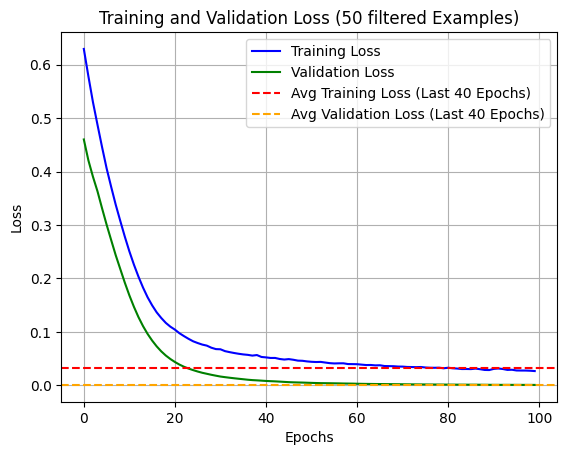

time: 14.8 s (started: 2025-02-01 17:37:59 +00:00)


In [ ]:
# ===============================
# TRAIN NEURAL NETWORK ON 50 EXAMPLES
# ===============================
train_file = "/content/data_set_cartpole/cartpole_data_50_filtered.json"
states, actions = load_data(train_file)

# Normalize the states for training data
states = scaler.fit_transform(states)

# Split the 50 examples into training (80%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(states, actions, test_size=0.1, random_state=42)

# Select random 10 examples for testing from the original 2000 test set
data_file = "/content/data_set_cartpole/cartpole_data_7000.json"
all_states, all_actions = load_data(data_file)

# Randomly sample 10 test examples
test_size = 10
test_indices = np.random.choice(range(len(all_states)), test_size, replace=False)
X_test = np.array([all_states[i] for i in test_indices])
y_test = np.array([all_actions[i] for i in test_indices])

# Normalize the test data using the same scaler as training
X_test = scaler.transform(X_test)

# Define the model
model_50_filtered = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(2, activation='softmax')  # Output: probabilities for 2 actions (left, right)
])

# Compile the model
learning_rate = 0.001
batch_size = 10  # Smaller batch size for fewer data points
epochs = 100
model_50_filtered.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with validation data
history = model_50_filtered.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=1)

# Plot loss
plot_loss_with_epoch_avg(history, title="Training and Validation Loss (50 filtered Examples)", avg_window=40)

**SECTION 20: Test Neural Network on Test Set of 50 filtered examples**


In [ ]:
# ===============================
# TEST NEURAL NETWORK ON TEST SET (50 EXAMPLES)
# ===============================
# Evaluate the model on the test data (20 examples)
test_loss, test_accuracy = model_50.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Print accuracy as percentage

# Test on the Gym environment and record video
video_filename = "cartpole_100_model.mp4"
best_steps, video_file = record_gym_video(model_50, scaler, video_filename , num_episodes = 10)

print(f"Model ran successfully for the best run with {best_steps} steps.")
print(f"Video saved as {video_file}")

# Display the video in the notebook
Video(video_file, embed=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8000 - loss: 1.7787
Test Loss: 1.7786893844604492, Test Accuracy: 0.800000011920929
Test Accuracy: 80.00%
Starting episode 1...
Episode 1 finished with 40 steps.
Starting episode 2...
Episode 2 finished with 42 steps.
Starting episode 3...
Episode 3 finished with 96 steps.
Starting episode 4...
Episode 4 finished with 40 steps.
Starting episode 5...
Episode 5 finished with 32 steps.
Starting episode 6...
Episode 6 finished with 62 steps.
Starting episode 7...
Episode 7 finished with 33 steps.
Starting episode 8...
Episode 8 finished with 123 steps.
Starting episode 9...
Episode 9 finished with 50 steps.
Starting episode 10...


Episode 10 finished with 35 steps.
Model ran successfully for the best run with 123 steps.
Video saved as cartpole_100_model.mp4


time: 42.1 s (started: 2025-02-01 17:38:14 +00:00)


**SECTION 21: Run model_100 inference ( best )  for 50 episodes and calculate average score**

Starting episode 1...
Episode 1 finished with 500 steps.
Starting episode 2...
Episode 2 finished with 138 steps.
Starting episode 3...
Episode 3 finished with 500 steps.
Starting episode 4...
Episode 4 finished with 305 steps.
Starting episode 5...
Episode 5 finished with 500 steps.
Starting episode 6...
Episode 6 finished with 402 steps.
Starting episode 7...
Episode 7 finished with 374 steps.
Starting episode 8...
Episode 8 finished with 500 steps.
Starting episode 9...
Episode 9 finished with 370 steps.
Starting episode 10...
Episode 10 finished with 500 steps.
Starting episode 11...
Episode 11 finished with 500 steps.
Starting episode 12...
Episode 12 finished with 500 steps.
Starting episode 13...
Episode 13 finished with 432 steps.
Starting episode 14...
Episode 14 finished with 410 steps.
Starting episode 15...
Episode 15 finished with 500 steps.
Starting episode 16...
Episode 16 finished with 500 steps.
Starting episode 17...
Episode 17 finished with 140 steps.
Starting episod

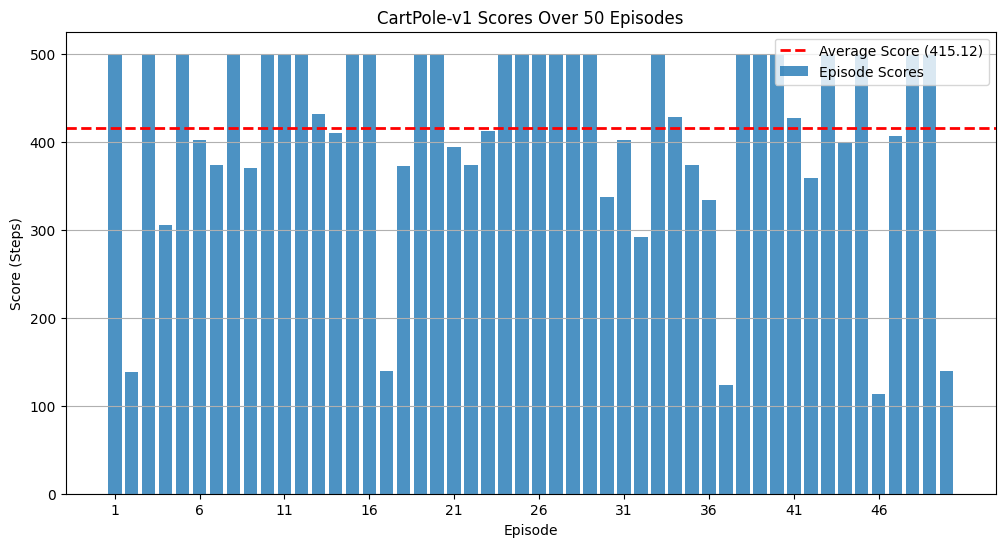

time: 25min 22s (started: 2025-02-01 17:56:29 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def run_multiple_episodes(model, scaler, num_episodes=100, max_steps=500):
    """
    Run the model for multiple episodes in the CartPole environment and calculate scores.
    Args:
        model: Trained neural network.
        scaler: Scaler used for normalizing states.
        num_episodes: Number of episodes to evaluate.
        max_steps: Maximum steps per episode.
    Returns:
        List of scores (steps achieved in each episode).
    """
    env = gym.make("CartPole-v1")
    scores = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        steps = 0

        print(f"Starting episode {episode + 1}...")

        while not done and steps < max_steps:
            # Normalize the state
            state_normalized = scaler.transform([state])
            action_probs = model.predict(state_normalized, verbose=0)
            action = np.argmax(action_probs[0])  # Choose the action with the highest probability

            # Take the action and update the state
            state, _, done, _, _ = env.step(action)
            steps += 1

        scores.append(steps)
        print(f"Episode {episode + 1} finished with {steps} steps.")

    env.close()
    return scores

# Run the model_100 for 50 episodes
scores = run_multiple_episodes(model_100, scaler, num_episodes=50, max_steps=500)

# Calculate the average score
average_score = np.mean(scores)

# Plot the scores as a bar chart with the average line
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(scores) + 1), scores, label='Episode Scores', alpha=0.8)
plt.axhline(y=average_score, color='r', linestyle='--', linewidth=2, label=f'Average Score ({average_score:.2f})')
plt.title(f'CartPole-v1 Scores Over 50 Episodes')
plt.xlabel('Episode')
plt.ylabel('Score (Steps)')
plt.xticks(range(1, len(scores) + 1, max(1, len(scores) // 10)))  # Dynamic ticks for clarity
plt.legend()
plt.grid(axis='y')
plt.show()
